# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from datetime import datetime
import sys

## 1) 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2) matlotlib 한글 설정

In [5]:
# !apt -qq -y install fonts-nanum
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## 3) 데이터 불러오기 시작

In [7]:
data1=pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/data1_noDT.csv') # 컬럼명 숫자로 들어가게
data1.head(1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,time,windForce,tem,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
0,2013-01-01,0:00,0.0,1.3,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10


In [8]:
data1.loc[data1['windSpeedQC'] == 9] #결측 data 0 처리

,date,time,windForce,tem,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
17389,2014-12-26,13:00,4799.0,6.0,0,0.0,9,0.0,9,0,9,0.0,0.0,5,1,ScCi,10
26409,2016-01-06,11:00,7624.0,7.5,0,0.0,0,0.0,9,0,9,0.0,0.0,0,0,0,0
26410,2016-01-06,12:00,11279.0,8.4,0,0.0,0,0.0,9,0,9,0.0,0.0,0,0,0,0
26411,2016-01-06,13:00,10092.0,8.9,0,0.0,0,0.0,9,0,9,0.0,0.0,0,0,0,0
45084,2018-02-22,16:00,2826.0,0.0,9,0.0,0,0.0,9,0,9,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58999,2019-09-25,11:00,588.0,24.4,0,0.0,0,0.0,9,0,9,0.0,0.0,4,4,0,10
59000,2019-09-25,12:00,481.0,23.9,0,0.0,0,0.0,9,0,9,0.0,0.0,7,2,0,11
59001,2019-09-25,13:00,689.0,23.7,0,0.0,0,0.0,9,0,9,0.0,0.0,5,1,0,11
59002,2019-09-25,14:00,577.0,23.2,0,0.0,0,0.0,9,0,9,0.0,0.0,6,1,0,9


In [9]:
data1.loc[data1['rainQC'] == 9] #결측 data 0 처리

,date,time,windForce,tem,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
0,2013-01-01,0:00,0.0,1.3,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10
4,2013-01-01,4:00,541.0,0.6,0,0.0,9,1.8,0,320,0,0.0,0.0,3,3,Sc,10
5,2013-01-01,5:00,945.0,2.9,0,0.0,9,3.6,0,290,0,0.0,0.0,3,3,Sc,10
6,2013-01-01,6:00,699.0,3.7,0,0.0,9,3.5,0,290,0,0.0,0.0,4,4,Sc,10
7,2013-01-01,7:00,1371.0,3.8,0,0.0,9,3.6,0,290,0,0.0,0.0,4,4,Sc,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60520,2019-11-27,20:00,7231.0,8.6,0,0.0,9,2.7,0,70,0,0.0,0.0,10,2,0,28
60521,2019-11-27,21:00,5680.0,8.3,0,0.0,9,2.0,0,110,0,0.0,0.0,10,10,0,29
60522,2019-11-27,22:00,5162.0,7.9,0,0.0,9,1.8,0,250,0,0.0,0.0,10,10,0,25
60523,2019-11-27,23:00,4392.0,8.1,0,0.0,9,2.3,0,340,0,0.0,0.0,10,10,0,22


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             60596 non-null  object 
 1   time             60596 non-null  object 
 2   windForce        60596 non-null  float64
 3   tem              60596 non-null  float64
 4   temQC            60596 non-null  int64  
 5   rain             60596 non-null  float64
 6   rainQC           60596 non-null  int64  
 7   windSpeed        60596 non-null  float64
 8   windSpeedQC      60596 non-null  int64  
 9   windDirection    60596 non-null  int64  
 10  windDirectionQC  60596 non-null  int64  
 11  snow             60596 non-null  float64
 12  snow3Hour        60596 non-null  float64
 13  cloud            60596 non-null  int64  
 14  middleCloud      60596 non-null  int64  
 15  clodeUn          60596 non-null  object 
 16  highCloud        60596 non-null  int64  
dtypes: float64(6

# 2. 데이터 가공하기 

## 1) datetime 컬럼 제작, datetime 형식으로 변환

In [11]:
df = data1.copy()
df['dateTime1'] = df['date'] + ' ' + df['time'] # date 하고 time 합치기

df['dateTime1'] = pd.to_datetime(df['dateTime1'],format='%Y-%m-%d %H:%M', errors='ignore') #합친거 datetime 형식으로 변환
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d', errors='ignore')  #date형식으로 변환
#df['time'] = pd.to_datetime(df['time'],format='%H:%M', errors='ignore') #time 형식으로 변환

df  = df[['dateTime1','date','time','tem','windForce','temQC','rain','rainQC','windSpeed','windSpeedQC','windDirection','windDirectionQC','snow','snow3Hour' ,'cloud','middleCloud','clodeUn','highCloud']] # 컬럼 순서 변경
#df = df.set_index('dateTime1') # dateTime을 index로 겹치지 않기 때문
df.head(5)

,dateTime1,date,time,tem,windForce,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud
0,2013-01-01 00:00:00,2013-01-01,0:00,1.3,0.0,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10
1,2013-01-01 01:00:00,2013-01-01,1:00,0.9,0.0,0,0.0,0,2.6,0,320,0,0.0,0.0,0,0,0,0
2,2013-01-01 02:00:00,2013-01-01,2:00,1.5,92.0,0,0.0,0,3.0,0,340,0,0.0,0.0,0,0,0,0
3,2013-01-01 03:00:00,2013-01-01,3:00,2.7,269.0,0,0.0,0,1.7,0,270,0,0.0,0.0,9,9,Sc,10
4,2013-01-01 04:00:00,2013-01-01,4:00,0.6,541.0,0,0.0,9,1.8,0,320,0,0.0,0.0,3,3,Sc,10


## 2) 년(year), 월(month), 일(day), 계절(season) 컬럼 생성



In [12]:
df['year'] = df['date'].dt.year # 년
df['month'] = df['date'].dt.month # 월
df['day'] = df['date'].dt.day# 일

conditionlist = [
    (df['month'] == 3)|(df['month'] == 4)| (df['month'] == 5) ,
    (df['month'] == 6)|(df['month'] == 7)|(df['month'] == 8) ,
    (df['month'] == 9)|(df['month'] == 10)|(df['month'] == 11),
    (df['month'] == 12)|(df['month'] == 1)|(df['month'] == 2) ]
choicelist = ['0', '1', '2','3']
#choicelist = ['spring', 'summer', 'autumn','winter']
df['season'] = np.select(conditionlist, choicelist, default='Not Specified')


In [43]:
df.head(5)

,dateTime1,date,time,tem,windForce,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,clodeUn,highCloud,year,month,day,season
0,2013-01-01 00:00:00,2013-01-01,0:00,1.3,0.0,0,0.0,9,3.2,0,340,0,0.0,0.0,3,3,Sc,10,2013,1,1,3
1,2013-01-01 01:00:00,2013-01-01,1:00,0.9,0.0,0,0.0,0,2.6,0,320,0,0.0,0.0,0,0,0,0,2013,1,1,3
2,2013-01-01 02:00:00,2013-01-01,2:00,1.5,92.0,0,0.0,0,3.0,0,340,0,0.0,0.0,0,0,0,0,2013,1,1,3
3,2013-01-01 03:00:00,2013-01-01,3:00,2.7,269.0,0,0.0,0,1.7,0,270,0,0.0,0.0,9,9,Sc,10,2013,1,1,3
4,2013-01-01 04:00:00,2013-01-01,4:00,0.6,541.0,0,0.0,9,1.8,0,320,0,0.0,0.0,3,3,Sc,10,2013,1,1,3


# 3. 데이터 분석 (차트 이용)

## 1) 계절별 발전량 데이터 (겨울 X축 - DateTime)

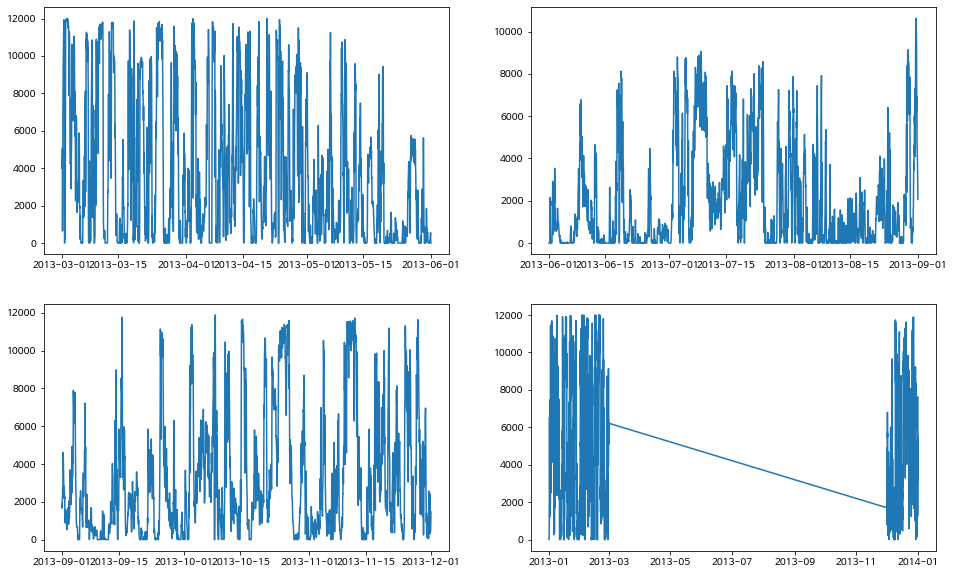

In [49]:
plt.figure(figsize=[16, 10])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==3,np.logical_or(df['month']==4,df['month']==5)))]
plt.subplot(221)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==6,np.logical_or(df['month']==7,df['month']==8)))]
plt.subplot(222)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==9,np.logical_or(df['month']==10,df['month']==11)))]
plt.subplot(223)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])

pltDf = df.loc[np.logical_and(df['dateTime1'].dt.year == 2013,np.logical_or(df['month']==12,np.logical_or(df['month']==1,df['month']==2)))]
plt.subplot(224)
plt.plot(pltDf['dateTime1'],pltDf['windForce'])
plt.show()
plt.close()

## 2) 년도별, 계절별 평균 발전량 


> 년도별, 계절별 평균 발전량 = 겨울 > 봄 > 가을 > 여름





In [15]:
df1 = df.groupby(['year','season'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','season','windForce']] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 
df1  =df1.rename(columns={'windForce':'windForceMean'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           28 non-null     int64  
 1   season         28 non-null     object 
 2   windForceMean  28 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 896.0+ bytes


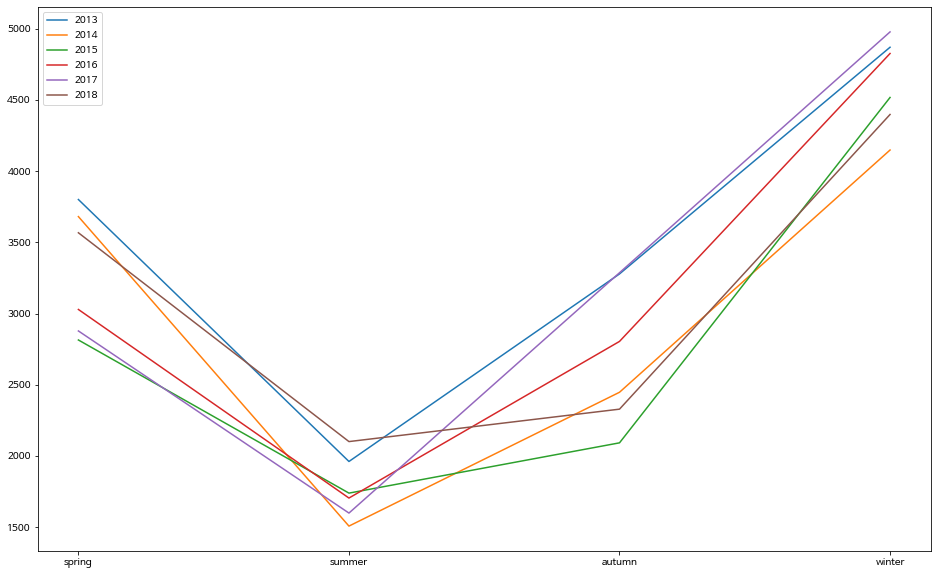

In [16]:
plt.figure(figsize=[16, 10])

a = 2013
val = ['spring','summer','autumn','winter']
for i in range(0,6): # 7까지 - 2019, 6까지 - 2018
  k = df1.loc[df1['year'] == a]
  plt.plot(k['season'],k['windForceMean'],label=a) 
  plt.xticks(k['season'], val) # x값 0,1,2,3 -> spring,summer,autumn,winter
  
  a = a + 1

plt.legend()
plt.show()
plt.close()

## 3) 년도별, 시간별 평균 발전량

> 년도별, 시간별 평균 발전량 = 13시 가장 발전량 많음





In [17]:
df1 = df.groupby(['year','time'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','time','windForce',]] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 
df1  =df1.rename(columns={'windForce':'windForceMean'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           168 non-null    int64  
 1   time           168 non-null    object 
 2   windForceMean  168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.2+ KB


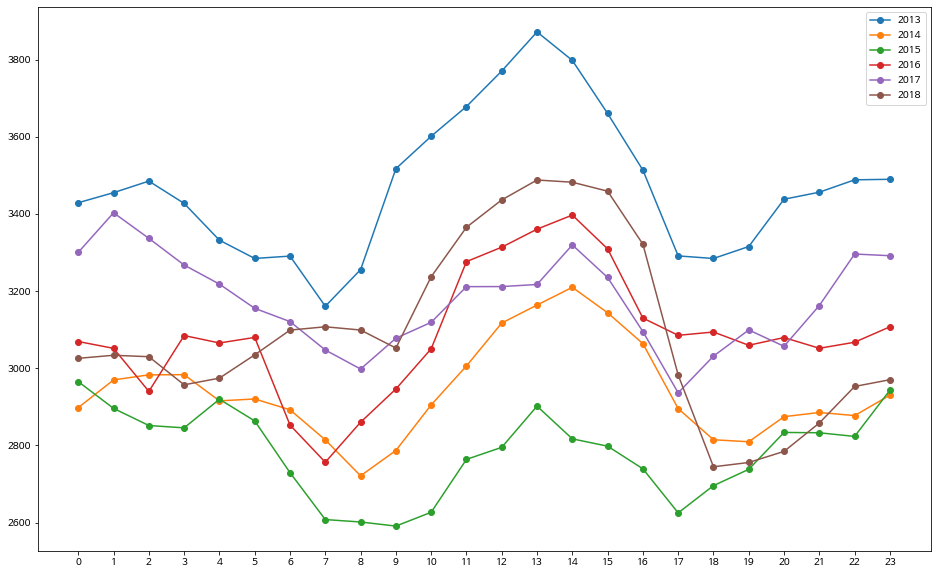

In [18]:
plt.figure(figsize=[16, 10])

a = 2013
val = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

for i in range(0,6): # 7까지 - 2019, 6까지 - 2018
  k = df1.copy()[df1['year'] == a] #복사해서 쓰기,,ㅎㅎ,,,copy()  안 그러면 warning 뜸
  k['time'] = pd.to_datetime(k['time'],format='%H:%M', errors='ignore') 
  k = k.sort_values(["time"], ascending=[True])
  plt.xticks(k['time'],val)
  plt.plot(k['time'],k['windForceMean'],label=a,marker="o")
  
  a = a + 1

plt.legend()
plt.show()
plt.close()

In [19]:
df .describe()

,tem,windForce,temQC,rain,rainQC,windSpeed,windSpeedQC,windDirection,windDirectionQC,snow,snow3Hour,cloud,middleCloud,highCloud,year,month,day
count,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000,60596.000000
mean,16.015004,3075.718993,0.002228,0.247891,1.775167,3.116501,0.011585,222.060037,0.020909,0.052253,0.000254,2.553337,1.651165,3.964701,2015.963166,6.457043,15.722110
std,8.060119,3333.356816,0.141585,1.835721,3.581270,1.737845,0.322695,112.767477,0.423902,0.812399,0.020488,3.715589,2.799067,9.204116,1.983918,3.415379,8.796493
min,-6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,9.200000,364.750000,0.000000,0.000000,0.000000,1.800000,0.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,4.000000,8.000000
50%,16.800000,1748.000000,0.000000,0.000000,0.000000,2.900000,0.000000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000
75%,22.600000,4939.000000,0.000000,0.000000,0.000000,4.100000,0.000000,320.000000,0.000000,0.000000,0.000000,6.000000,3.000000,7.000000,2018.000000,9.000000,23.000000
max,34.100000,12005.000000,9.000000,68.300000,9.000000,17.700000,9.000000,360.000000,9.000000,23.500000,2.500000,10.000000,10.000000,76.000000,2019.000000,12.000000,31.000000


## 4) 년도별 평균 발전량

In [51]:
df1 = df.groupby(['year'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','windForce','windSpeed']] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 

df1  =df1.rename(columns={'windForce':'windForceMean'})
df1  =df1.rename(columns={'windSpeed':'windSpeedMean'})

df1.head()

,year,windForceMean,windSpeedMean
0,2013,3470.586073,3.344269
1,2014,2940.790868,3.143870
2,2015,2783.425782,2.937052
3,2016,3086.990209,2.973327
4,2017,3175.294474,3.105869


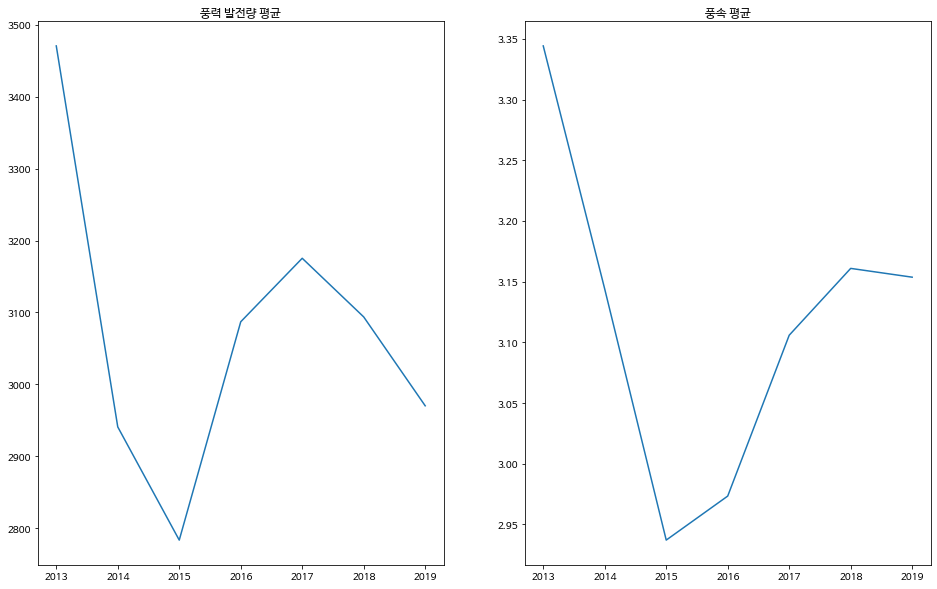

In [52]:
k = df1.copy()

plt.figure(figsize=[16, 10])

plt.subplot(121)
ax = plt.plot(k['year'],k['windForceMean'])
plt.gca().set_title('풍력 발전량 평균')
plt.subplot(122)
ax1 = plt.plot(k['year'],k['windSpeedMean'])
plt.gca().set_title('풍속 평균')

plt.show()
plt.close()

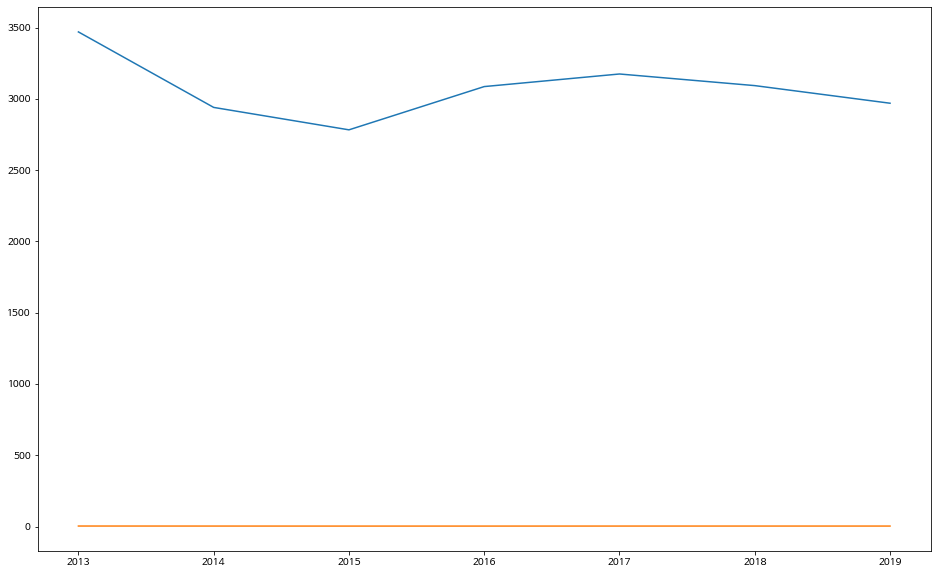

In [53]:
k = df1.copy()

plt.figure(figsize=[16, 10])

plt.plot(k['year'],k['windForceMean'])

plt.plot(k['year'],k['windSpeedMean'])


plt.show()
plt.close()

## 5) 년도별 평균 풍력

In [22]:
df1 = df.groupby(['year'],as_index=False).mean() # 년도별, 계절별 windForce 평균
df1 = df1[['year','windSpeed',]] # 컬럼 여기 정의된 3개만 따로 해서 df1에 저장 
df1  =df1.rename(columns={'windSpeed':'windSpeedMean'})

df1.head()

,year,windSpeedMean
0,2013,3.344269
1,2014,3.143870
2,2015,2.937052
3,2016,2.973327
4,2017,3.105869


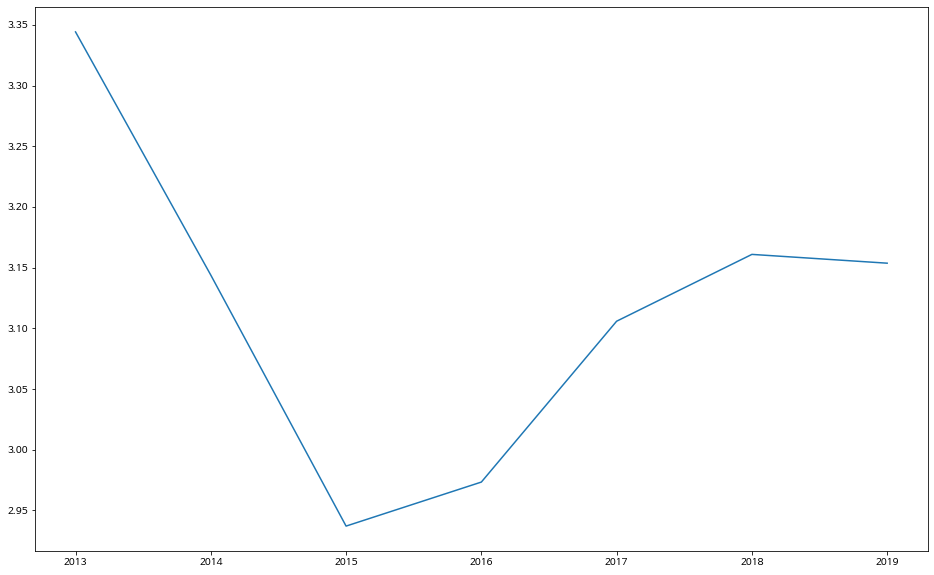

In [23]:
k = df1.copy()

plt.figure(figsize=[16, 10])

plt.plot(k['year'],k['windSpeedMean'])

plt.show()
plt.close()

## +

In [24]:
df2 = df[['dateTime1','year','month','day','season','windForce','windSpeed','rain','cloud']].copy()

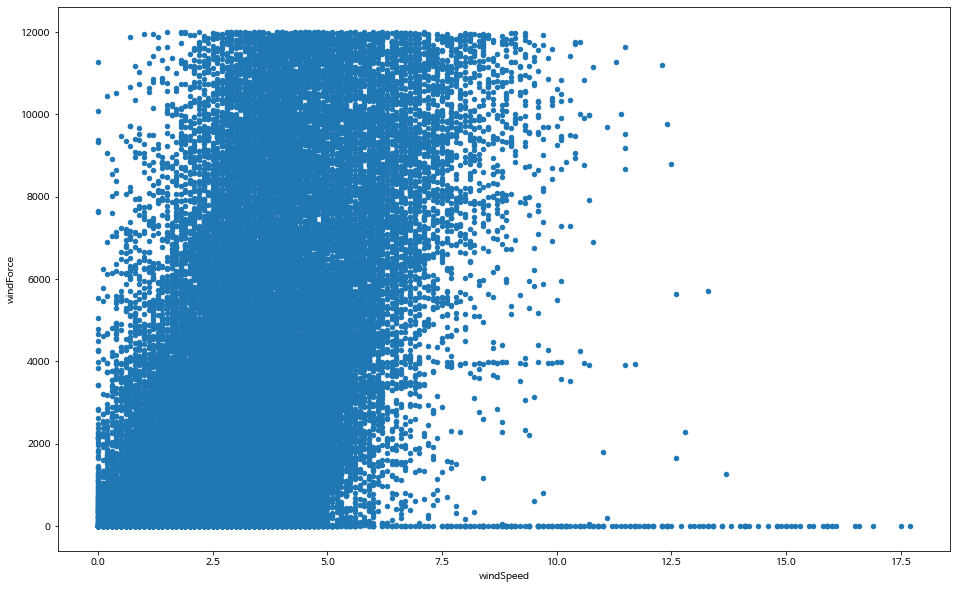

In [25]:
df2.plot(kind='scatter',x='windSpeed',y='windForce',figsize=(16,10))
plt.show()
plt.close()

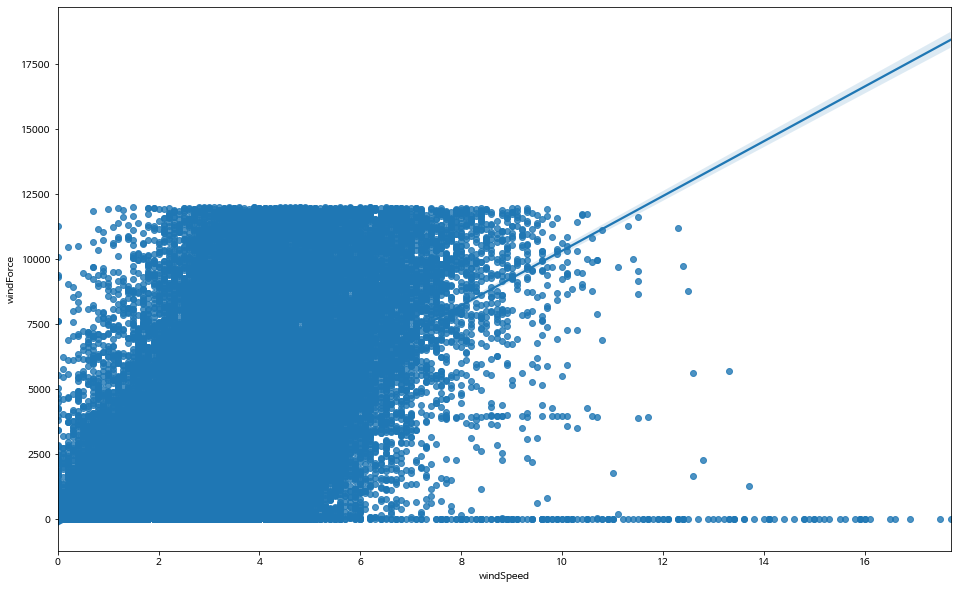

In [26]:
fig = plt.figure(figsize=(16,10))
sns.regplot(x='windSpeed',y='windForce',data=df2)
plt.show()
plt.close()

<Figure size 1152x720 with 0 Axes>

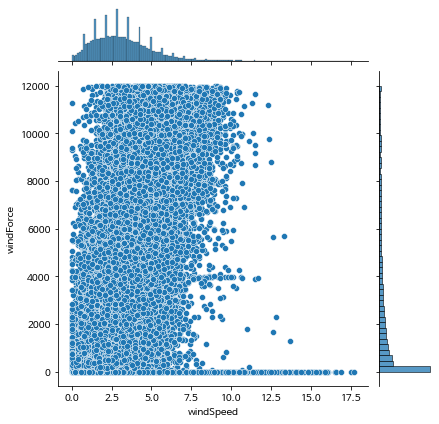

In [27]:
fig = plt.figure(figsize=(16,10))
sns.jointplot(x='windSpeed',y='windForce',data=df2)
plt.show()
plt.close()

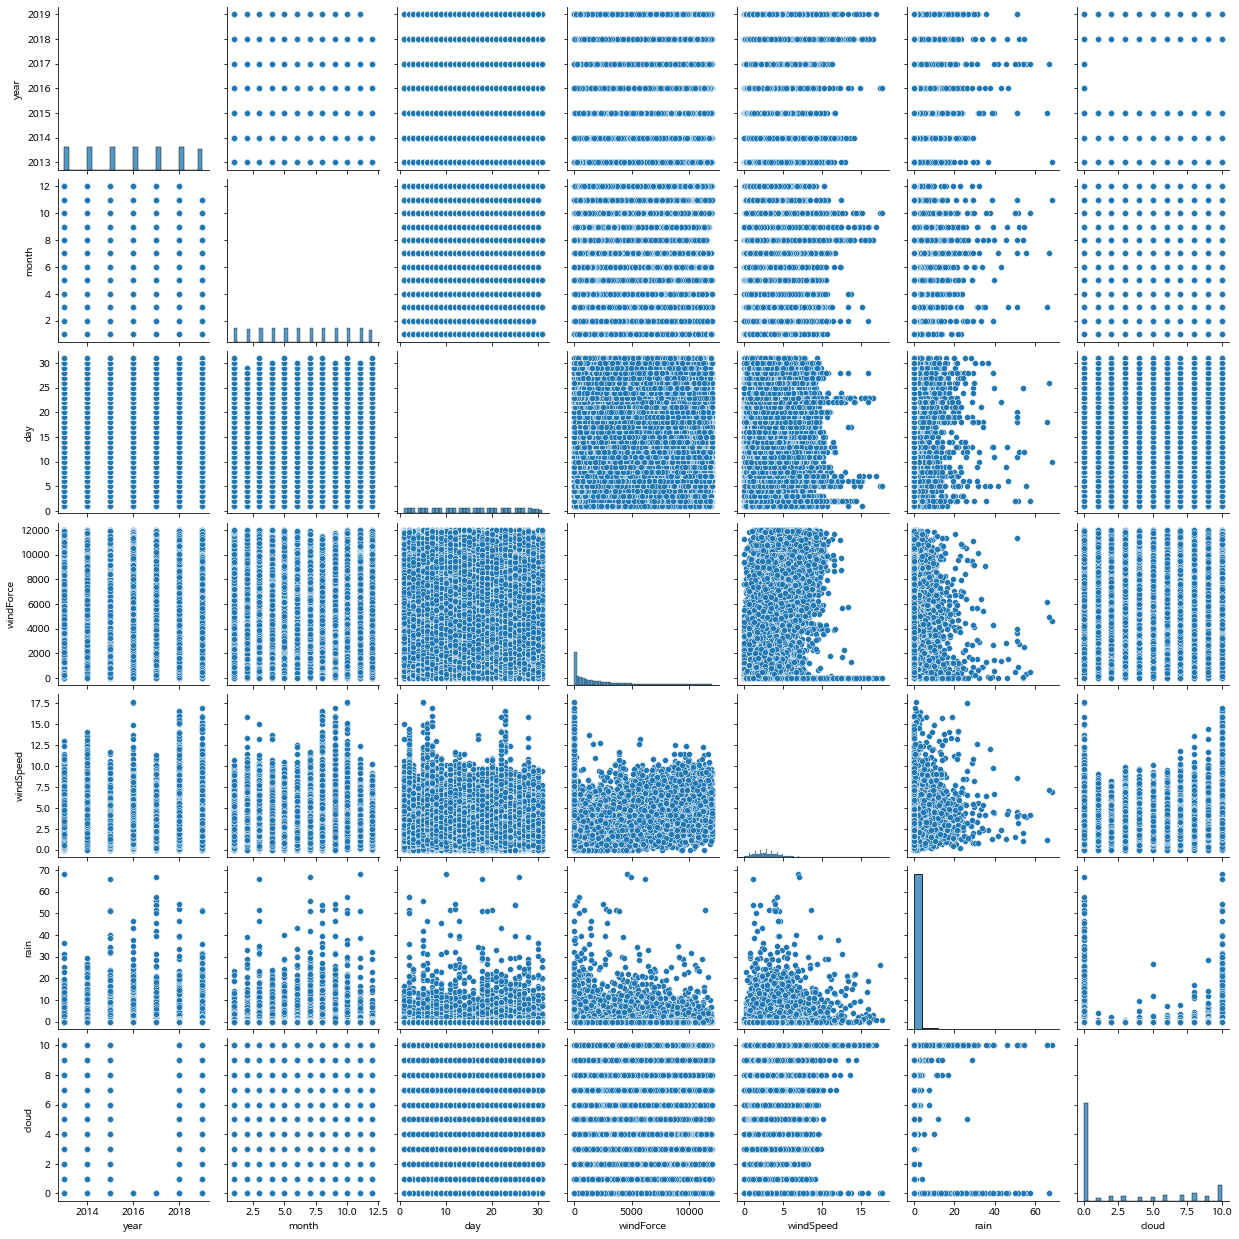

In [28]:
grid_df2 = sns.pairplot(df2)
plt.show()
plt.close()

# 4. 훈련 & 예측

## 1) train-test data 나누기

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df2[['windSpeed']]
y = df2[['windForce']]
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print('train data 개수 : ', len(X_train))
print('test data 개수: ', len(X_test))

print(len(X_train)+len(X_test))

train data 개수 :  42417
test data 개수:  18179
60596


## 2) LinearRegression() // 단순회귀분석

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

r_square = lr.score(X_test,y_test)
print(r_square)

0.29765115550546073


In [33]:
y_hat = lr.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


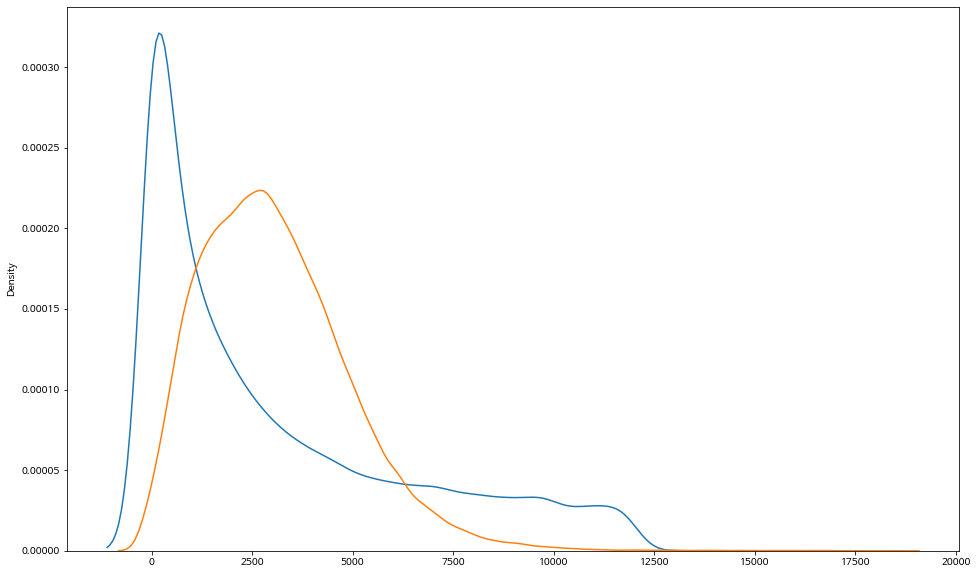

In [34]:
plt.figure(figsize=(16,10))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat',ax = ax1)
plt.show()
plt.close()

## 3) PolynomioalFeatures() // 다항회귀분석

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
poly  = PolynomialFeatures(degree=2) #2차항 적용
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차항으로 변형

print('원 데이터 : ',X_train.shape)
print('2차항 변환 데이터 : ',X_train_poly.shape)

원 데이터 :  (42417, 1)
2차항 변환 데이터 :  (42417, 3)


In [37]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)

r_square = pr.score(X_test_poly,y_test)
print(r_square)
# 단순회귀분석보다 r_square 값이 조금 증가하였다.

0.30837061711271263


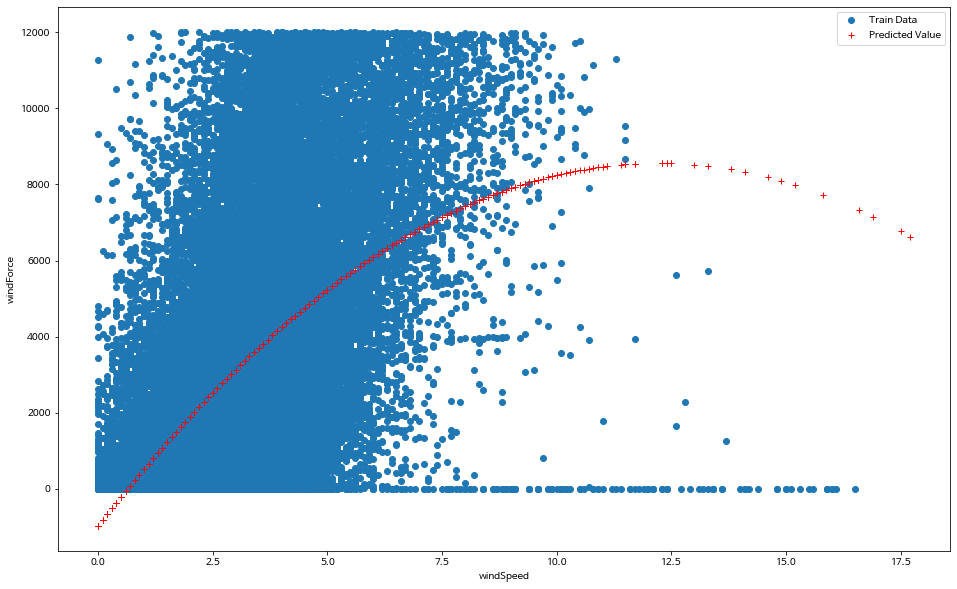

In [38]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('windSpeed')
plt.ylabel('windForce')

plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 miss

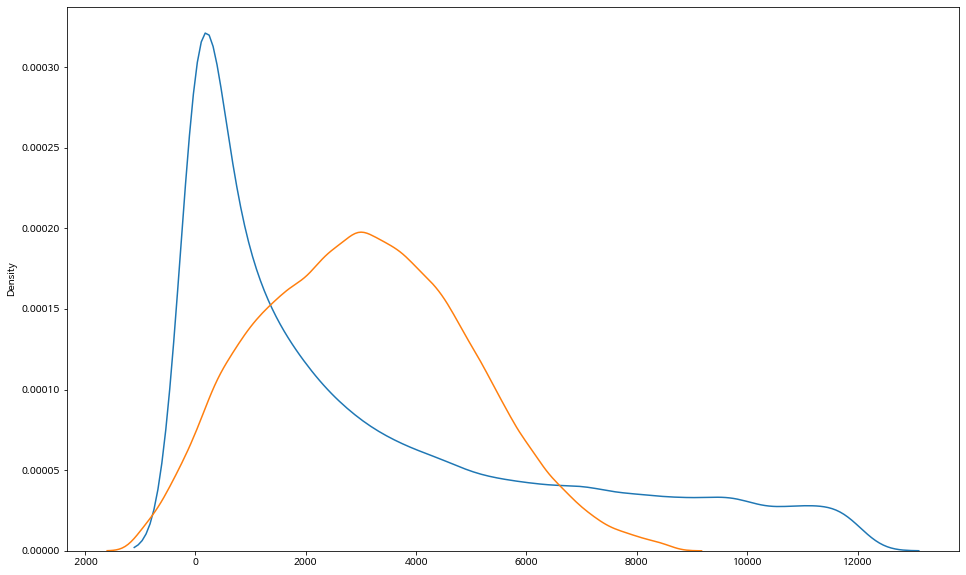

In [39]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)
plt.figure(figsize=(16,10))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat',ax=ax1)

plt.show()
plt.close()

## 4) ARIMA 모델

In [40]:
df3 = df.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dateTime1        60596 non-null  datetime64[ns]
 1   date             60596 non-null  datetime64[ns]
 2   time             60596 non-null  object        
 3   tem              60596 non-null  float64       
 4   windForce        60596 non-null  float64       
 5   temQC            60596 non-null  int64         
 6   rain             60596 non-null  float64       
 7   rainQC           60596 non-null  int64         
 8   windSpeed        60596 non-null  float64       
 9   windSpeedQC      60596 non-null  int64         
 10  windDirection    60596 non-null  int64         
 11  windDirectionQC  60596 non-null  int64         
 12  snow             60596 non-null  float64       
 13  snow3Hour        60596 non-null  float64       
 14  cloud            60596 non-null  int64

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dateTime1        60596 non-null  datetime64[ns]
 1   date             60596 non-null  datetime64[ns]
 2   time             60596 non-null  object        
 3   tem              60596 non-null  float64       
 4   windForce        60596 non-null  float64       
 5   temQC            60596 non-null  int64         
 6   rain             60596 non-null  float64       
 7   rainQC           60596 non-null  int64         
 8   windSpeed        60596 non-null  float64       
 9   windSpeedQC      60596 non-null  int64         
 10  windDirection    60596 non-null  int64         
 11  windDirectionQC  60596 non-null  int64         
 12  snow             60596 non-null  float64       
 13  snow3Hour        60596 non-null  float64       
 14  cloud            60596 non-null  int64

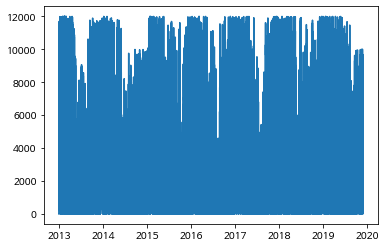

In [42]:
plt.plot(df3['dateTime1'],df3['windForce'])
plt.show()
plt.close()